In [184]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Уровень доверия

In [185]:
def get_normal_samples(n):
    k = 50
    norm_rv = sps.norm(loc=10, scale=2)
    samples = []
    for i in range(k):
        samples.append(norm_rv.rvs(size=n))
    
    return np.array(samples)

In [186]:
def get_means(samples):
    means = []
    for i in range(len(samples)):
        means.append(samples[i].mean())
    
    return np.array(means)

In [187]:
def get_borders(means, p):
    norm_rv = sps.norm(0, 1)
    fp = norm_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - fp*(2/np.sqrt(10)))
        right.append(means[i] + fp*(2/np.sqrt(10)))

    return np.array(left), np.array(right)

In [188]:
def print_quantile(ps):
    norm_rv = sps.norm(0, 1)
    quantiles = list(map(lambda x: np.round(x, 3), norm_rv.ppf(ps)))
    df = pd.DataFrame()
    df['Pд'] = ps
    df['Значение квантили fp'] = quantiles
    return df

In [189]:
print_quantile([0.9, 0.99, 0.999])

,Pд,Значение квантили fp
0,0.900,1.282
1,0.990,2.326
2,0.999,3.090


In [190]:
samples = get_normal_samples(10)
means = get_means(samples)
df = pd.DataFrame(samples)
df['mean'] = means
left, right = get_borders(means, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.975472,10.944046,8.184933,7.508874,8.472306,5.687122,11.727944,11.477098,12.499248,8.822244,9.529929,8.719404,10.340453
1,8.187426,9.511006,9.773471,11.142816,10.412830,13.893574,8.724382,11.915363,8.154201,9.338632,10.105370,9.294846,10.915894
2,7.381771,8.788755,8.605309,12.407212,10.771873,10.221817,10.906589,9.462526,10.025676,9.975590,9.854712,9.044187,10.665236
3,8.064167,6.685227,8.550564,9.129148,8.982779,13.017767,6.233215,9.092558,12.161196,9.664774,9.158140,8.347615,9.968664
4,7.529388,10.579531,14.275249,9.671251,10.203123,13.150975,8.510036,10.755480,11.320881,10.863686,10.685960,9.875436,11.496484


In [191]:
def draw_borders(left, right):
    x = np.linspace(1, 50, 50)
    plt.axis([0, 51, 5, 15])
    plt.plot(x, left, label='a1')
    plt.plot(x, right, label='a2')
    plt.scatter(x, left, s=15)
    plt.scatter(x, right, s=15)
    plt.xlabel('Номер испытания')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()

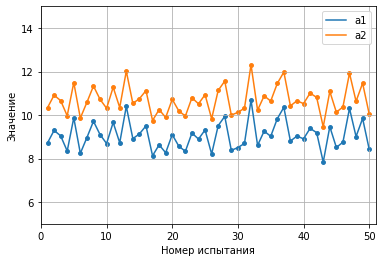

In [192]:
draw_borders(left, right)

In [193]:
left, right = get_borders(means, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.975472,10.944046,8.184933,7.508874,8.472306,5.687122,11.727944,11.477098,12.499248,8.822244,9.529929,8.058617,11.001240
1,8.187426,9.511006,9.773471,11.142816,10.412830,13.893574,8.724382,11.915363,8.154201,9.338632,10.105370,8.634058,11.576682
2,7.381771,8.788755,8.605309,12.407212,10.771873,10.221817,10.906589,9.462526,10.025676,9.975590,9.854712,8.383400,11.326023
3,8.064167,6.685227,8.550564,9.129148,8.982779,13.017767,6.233215,9.092558,12.161196,9.664774,9.158140,7.686828,10.629451
4,7.529388,10.579531,14.275249,9.671251,10.203123,13.150975,8.510036,10.755480,11.320881,10.863686,10.685960,9.214648,12.157272


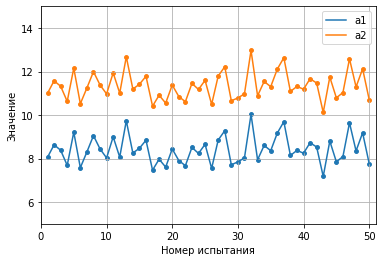

In [194]:
draw_borders(left, right)

In [195]:
left, right = get_borders(means, 0.999)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.975472,10.944046,8.184933,7.508874,8.472306,5.687122,11.727944,11.477098,12.499248,8.822244,9.529929,7.575494,11.484363
1,8.187426,9.511006,9.773471,11.142816,10.412830,13.893574,8.724382,11.915363,8.154201,9.338632,10.105370,8.150935,12.059805
2,7.381771,8.788755,8.605309,12.407212,10.771873,10.221817,10.906589,9.462526,10.025676,9.975590,9.854712,7.900277,11.809146
3,8.064167,6.685227,8.550564,9.129148,8.982779,13.017767,6.233215,9.092558,12.161196,9.664774,9.158140,7.203705,11.112574
4,7.529388,10.579531,14.275249,9.671251,10.203123,13.150975,8.510036,10.755480,11.320881,10.863686,10.685960,8.731526,12.640395


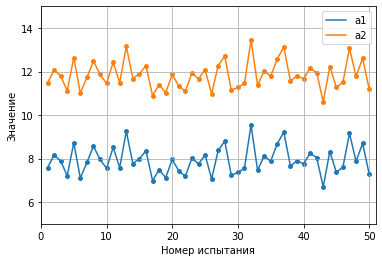

In [196]:
draw_borders(left, right)

### Для случая с неизвестной дисперсией

## Интервалы для среднего нормальной совокупности

In [197]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(20)
mean = sample.mean()

ps = [0.8, 0.9, 0.95, 0.98, 0.99, 0.999]
ps = list(map(lambda x: (1+x)/2, ps))
left, right = [], []
for p in ps:
    fp = sps.norm(0,1).ppf(p)
    left.append(mean - fp*(2/np.sqrt(20)))
    right.append(mean + fp*(2/np.sqrt(20)))
    
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
df

,left,right
0.9000,9.558511,10.704766
0.9500,9.396038,10.867239
0.9750,9.255116,11.008161
0.9900,9.091264,11.172013
0.9950,8.979693,11.283584
0.9995,8.660070,11.603207


## Задача

n=20, Pд=0.99, a=300

In [198]:
N = 10000
a = 300
n = 20
uni_rv = sps.uniform(loc=a)
sample = uni_rv.rvs(n)
sample

array([300.690347  , 300.58632856, 300.01929277, 300.97734797,
       300.55078377, 300.25115664, 300.14691981, 300.79668338,
       300.28072633, 300.94997036, 300.55966861, 300.95401827,
       300.86209142, 300.93017371, 300.16861532, 300.94141548,
       300.10595402, 300.50527686, 300.24677294, 300.23749538])

In [199]:
Pd = 0.99
mean = sample.mean()
chi2_rv = sps.chi2(df=2*n)
t1, t2 = chi2_rv.ppf((1-Pd)/2), chi2_rv.ppf((1+Pd)/2)
print(t1, t2)
a1, a2 = 2*n*mean / t2, 2*n*mean / t1
print('Доверительный интервал для a ({:.2f}, {:.2f})'.format(a1, a2))

m1, m2 = N*(1 - np.exp(-50/a2)), N*(1 - np.exp(-50/a1))
print('Доверительный интервал для M ({:.2f}, {:.2f})'.format(m1, m2))

20.706535316970086 66.76596183280391
Доверительный интервал для a (180.05, 580.57)
Доверительный интервал для M (825.18, 2424.71)
